In [15]:
# 데이터 처리 및 분석을 위한 라이브러리
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 머신러닝 모델 및 도구
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload() # kaggle.json 파일 업로드
#개인 키라 출력은 삭제함.

In [ ]:
# 캐글 API 키 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 데이터셋 다운로드
!kaggle competitions download -c spaceship-titanic

# 압축 해제
!unzip spaceship-titanic.zip

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 196MB/s]
Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# 데이터 불러오기
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')

print("Train 데이터 형태:", train_df.shape)
print("Test 데이터 형태:", test_df.shape)

# 데이터 미리보기
train_df.head()

Train 데이터 형태: (8693, 14)
Test 데이터 형태: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


이제부터... 데이터를 이래저래 만져봐야 하는데. 어쩌다 보니 19시까지 얼마 안남았다!!!!!

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
# 컬럼별 결측치 개수 확인
train_df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


진짜 시간이 별로 없어서 스크립트 작성은 바이브코딩 식으로 해야 것고....

일단 사이트 데이터 설명 번역

---

파일 및 데이터 필드 설명

train.csv - 승객의 약 3분의 2(~8700명)에 대한 개인 기록으로, 훈련 데이터로 사용됩니다.

PassengerId- 각 승객마다 고유 ID가 부여됩니다. 각 ID는 다음과 같은 형식을 취합니다. gggg_pp여기서 는 gggg승객이 함께 여행하는 그룹을 나타내고, pp는 그룹 내 인원 수를 나타냅니다. 그룹에 포함된 사람들은 대개 가족이지만, 항상 그런 것은 아닙니다.

HomePlanet- 승객이 출발한 행성, 일반적으로는 영구 거주 행성입니다.

CryoSleep- 승객이 항해 기간 동안 가상현실(Cyoscetive) 상태에 놓이도록 선택했는지 여부를 나타냅니다. 냉동 수면 상태의 승객은 객실에 격리됩니다.

Cabin- 승객이 투숙하는 객실 번호. 형태로 표시되며 deck/num/side, 는 Port 또는 Starboard 를 의미 side합니다 .PS

Destination- 승객이 내릴 행성.

Age- 승객의 나이.

VIP- 승객이 항해 중 특별 VIP 서비스에 대한 비용을 지불했는지 여부.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- 승객이 타이타닉호의 다양한 고급 편의시설에 대해 청구한 금액입니다.

Name- 승객의 성과 이름.

Transported- 승객이 다른 차원으로 이동했는지 여부. 이것이 바로 당신이 예측하려는 대상, 즉 기둥입니다.

#
#
#

test.csv - 나머지 3분의 1(약 4,300명) 승객에 대한 개인 기록으로, 테스트 데이터로 사용할 수 있습니다. Transported이 데이터 세트에 포함된 승객의 가치를 예측하는 것이 과제입니다.

sample_submission.csv - 올바른 형식의 제출 파일.

PassengerId- 테스트 세트의 각 승객에 대한 ID입니다.

Transported- 목표. 각 승객에 대해 또는 True을 예측합니다 False.

---
사실 필드가 그렇게 많지 않아서... 찍어가면서 봐도 연관성 있을 확률 꽤 되긴함.
일단 cryosleep 란 값이 특이해보이니 이거 따져보고. cabin에 따른 차이도 따지고, homePlanet destination도... 일반적으론 저거때매 재난에서 달라지는게 말이돼? 싶지만 cryosleep이랑 cabin에서 유의미한 특징이 없으면 봐야것지?

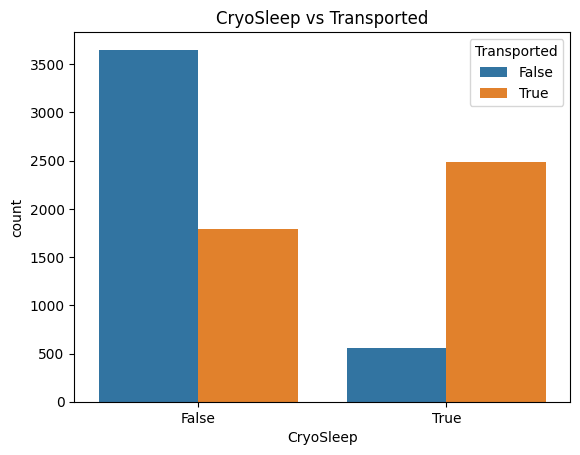

In [ ]:
sns.countplot(data=train_df, x='CryoSleep', hue='Transported')
plt.title('CryoSleep vs Transported')
plt.show()

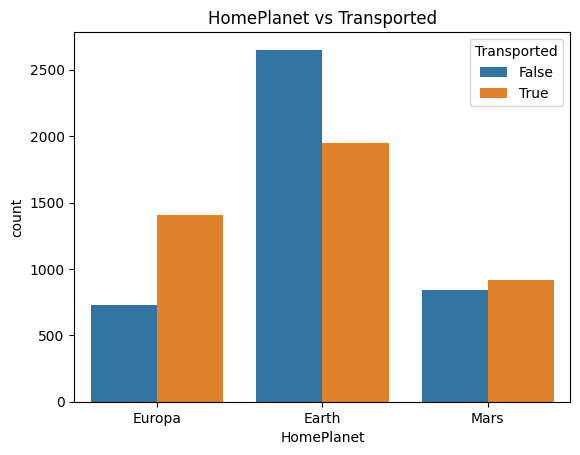

In [ ]:
sns.countplot(data=train_df, x='HomePlanet', hue='Transported')
plt.title('HomePlanet vs Transported')
plt.show()

cylo sleep 한 사람은 매우 많은 과반이 transported 됨 , europa출신이 mars나 earth에 비해 유난히 많이 transported됨 등이 보이긴 하는데...

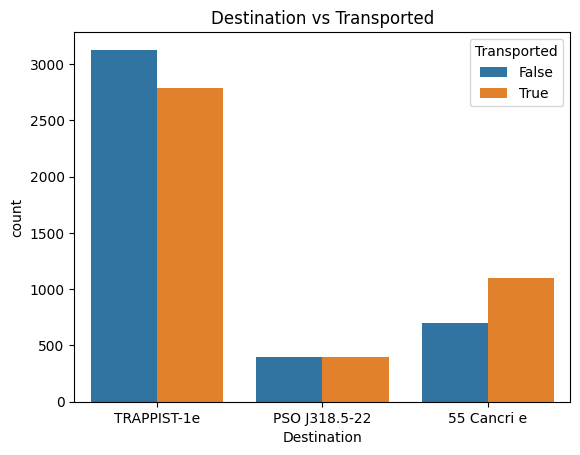

In [ ]:
# Destination에 따른 Transported 시각화
sns.countplot(data=train_df, x='Destination', hue='Transported')
plt.title('Destination vs Transported')
plt.show()

In [ ]:
# Cabin 열을 '/' 기준으로 분리하여 Deck, Num, Side 생성 (결측치는 Unknown으로)
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)

# test_df도 동일하게 처리
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

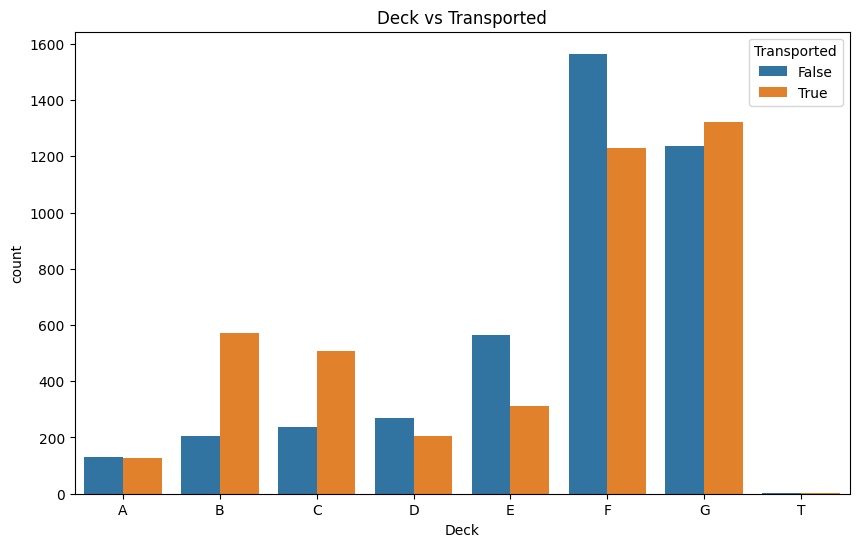

In [ ]:
# Deck에 따른 Transported 시각화
plt.figure(figsize=(10, 6)) # 그래프 크기 조절
sns.countplot(data=train_df, x='Deck', hue='Transported', order=sorted(train_df['Deck'].dropna().unique()))
plt.title('Deck vs Transported')
plt.show()

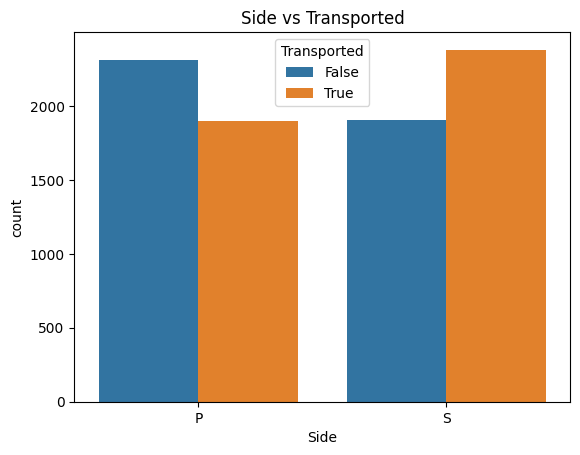

In [16]:
# Side에 따른 Transported 시각화
sns.countplot(data=train_df, x='Side', hue='Transported')
plt.title('Side vs Transported')
plt.show()

In [17]:
# 'Name' 컬럼에서 Last Name 추출 (결측치는 'Unknown'으로 처리)
train_df['LastName'] = train_df['Name'].str.split().str[-1]
test_df['LastName'] = test_df['Name'].str.split().str[-1]

# train 데이터 기준으로 Last Name별 인원수(가족 규모) 계산
# transform을 사용해 각 승객에게 자신의 가족 규모를 할당
family_size = train_df.groupby('LastName')['LastName'].transform('count')
train_df['FamilySize'] = family_size

# test 데이터에도 동일하게 적용 (train 데이터의 가족 정보를 기준으로 매핑)
test_family_map = train_df.groupby('LastName')['FamilySize'].first()
test_df['FamilySize'] = test_df['LastName'].map(test_family_map).fillna(1) # train에 없는 가족은 1인 가족으로 처리

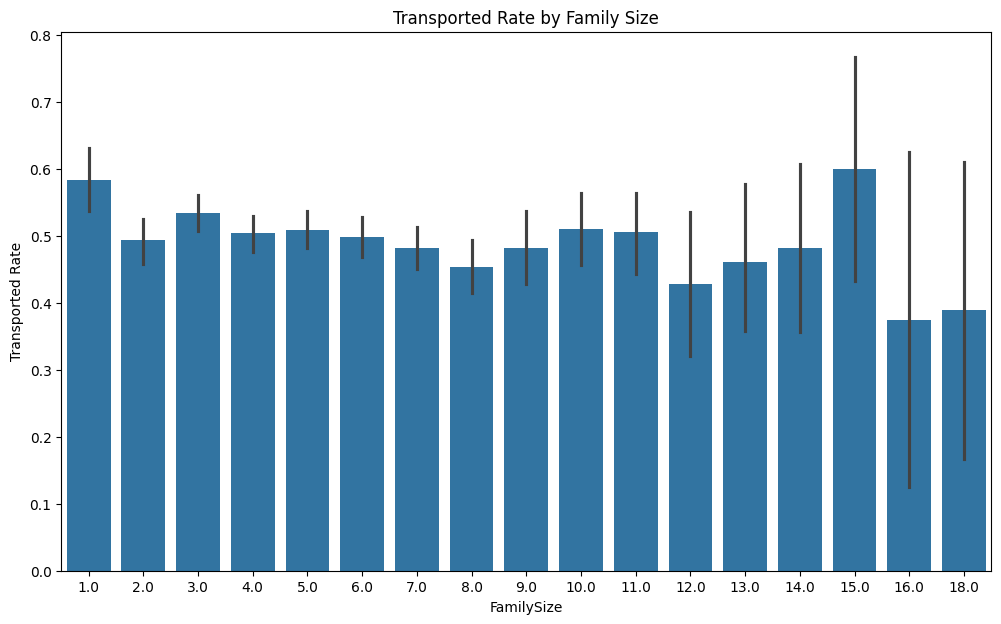

In [18]:
# 가족 규모(FamilySize)에 따른 Transported 비율 시각화
plt.figure(figsize=(12, 7))
sns.barplot(data=train_df, x='FamilySize', y='Transported')
plt.title('Transported Rate by Family Size')
plt.ylabel('Transported Rate')
plt.show()

cabin에 대해 b c 구역이 유난히 transported가 되었다는건 알겠는데, 다른 부분들은 약간의 차이는 있는데 확 튀는건 없네?

도착지에 대해선 55 cancri 라는데가 도착지면 유난히 transported되긴 하는데 연관은 모르겠다.

family size 는 미묘한 차이가 있긴 한데...

일단 다음 조건으로 스크립트 생성(gemini)

이 데이터에 대해서 다음과 같은 처리를 하는 스크립트 만들어줘
HomePlanet , Transported 둘을 문자를 숫자로 바꾸는 전처리
Age 컬럼에 빈 값을 평균으로 채우는 전처리
Cobin이라는 데이터가 Deck/Num/Side 로 구성되있는데 이거 분리
Name은 의미 없어 보이니 제거

In [19]:
# 0. 전처리 전 데이터 복사 (원본 유지를 위해)
train_processed = train_df.copy()
test_processed = test_df.copy()

# 1. Age 컬럼의 빈 값을 train 데이터의 평균 나이로 채우기
age_mean = train_processed['Age'].mean()
train_processed['Age'].fillna(age_mean, inplace=True)
test_processed['Age'].fillna(age_mean, inplace=True) # test 데이터에도 train의 평균값을 적용

# 2. Cabin 컬럼을 Deck, Num, Side로 분리하기
train_processed[['Deck', 'Num', 'Side']] = train_processed['Cabin'].str.split('/', expand=True)
test_processed[['Deck', 'Num', 'Side']] = test_processed['Cabin'].str.split('/', expand=True)

# 3. HomePlanet을 숫자로 변환 (원-핫 인코딩)
train_processed = pd.get_dummies(train_processed, columns=['HomePlanet'], prefix='HP')
test_processed = pd.get_dummies(test_processed, columns=['HomePlanet'], prefix='HP')

# 4. Transported 컬럼을 숫자로 변환 (True -> 1, False -> 0)
train_processed['Transported'] = train_processed['Transported'].astype(int)

# 5. 불필요한 컬럼 제거 (Name, Cabin)
train_processed.drop(['Name', 'Cabin'], axis=1, inplace=True)
test_processed.drop(['Name', 'Cabin'], axis=1, inplace=True)


# --- 전처리 결과 확인 ---
print("--- 전처리 후 데이터 정보 ---")
train_processed.info()

print("\n--- 전처리 후 데이터 샘플 ---")
train_processed.head()

--- 전처리 후 데이터 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8494 non-null   object 
 12  Num           8494 non-null   object 
 13  Side          8494 non-null   object 
 14  LastName      8493 non-null   object 
 15  FamilySize    8493 non-null   float64
 16  HP_Earth      8693 non-null   bool   
 17  HP_Europa     8693 non-null   bool   
 18  HP_Mars

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,LastName,FamilySize,HP_Earth,HP_Europa,HP_Mars
0,0001_01,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0,P,Ofracculy,1.0,False,True,False
1,0002_01,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,S,Vines,4.0,True,False,False
2,0003_01,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,Susent,6.0,False,True,False
3,0003_02,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,Susent,6.0,False,True,False
4,0004_01,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,S,Santantines,6.0,True,False,False


랜덤 포레스트로 해보려고 함.

k-mean이나 랜덤포레스트 둘다 혹은 둘중 하나로 일단 돌려보자 싶었는데

지금 시간이 얼마 없어서 정답이 있는 데이터니까 (제출하기 위한 test csv가
있으니까) 랜덤 포레스트를 해보기로




In [22]:
# 훈련 데이터와 테스트 데이터를 합쳐서 원-핫 인코딩을 한 번에 처리
# -> train/test에만 존재하는 카테고리가 있을 경우 에러 방지
combined_df = pd.concat([train_processed.drop('Transported', axis=1), test_processed], ignore_index=True)

# CryoSleep, Destination, VIP, Deck, Side 컬럼을 원-핫 인코딩
combined_df = pd.get_dummies(combined_df, columns=['CryoSleep', 'Destination', 'VIP', 'Deck', 'Side'], dummy_na=True) # dummy_na=True로 결측치도 하나의 카테고리로 포함

# 비용 관련 컬럼들의 결측치는 0으로 채움 (비용을 쓰지 않았다고 가정)
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    combined_df[col].fillna(0, inplace=True)

# 불필요한 object 타입 컬럼 'Num' 제거
combined_df.drop(['Num', 'LastName'], axis=1, inplace=True)

# 다시 train과 test 데이터로 분리
X = combined_df[:len(train_processed)].drop('PassengerId', axis=1)
X_test = combined_df[len(train_processed):].drop('PassengerId', axis=1)
y = train_processed['Transported']

# 최종 확인
print("훈련 데이터 형태:", X.shape)
print("타겟 데이터 형태:", y.shape)
print("테스트 데이터 형태:", X_test.shape)

훈련 데이터 형태: (8693, 32)
타겟 데이터 형태: (8693,)
테스트 데이터 형태: (4277, 32)


In [23]:
from sklearn.ensemble import RandomForestClassifier

# 1. 모델 정의
# n_estimators: 만들 트리의 개수
# random_state: 재현 가능성을 위한 시드 고정
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# 2. 모델 훈련
print("\n모델 훈련을 시작합니다...")
model.fit(X, y)
print("모델 훈련 완료!")

# 3. 테스트 데이터로 예측 수행
predictions = model.predict(X_test)


모델 훈련을 시작합니다...
모델 훈련 완료!


In [24]:
from google.colab import files

# 1. 제출 파일 형식에 맞게 데이터프레임 생성
submission_df = pd.DataFrame({'PassengerId': test_processed['PassengerId'], 'Transported': predictions})

# 2. 예측 결과(0 또는 1)를 boolean(False 또는 True)으로 변환
submission_df['Transported'] = submission_df['Transported'].astype(bool)

# 3. CSV 파일로 저장 (index=False는 불필요한 인덱스 열 방지)
submission_df.to_csv('random_forest_submission.csv', index=False)

# 4. Colab 환경에서 파일 다운로드
files.download('random_forest_submission.csv')

print("\n제출 파일 'random_forest_submission.csv' 생성 완료!")
submission_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


제출 파일 'random_forest_submission.csv' 생성 완료!


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


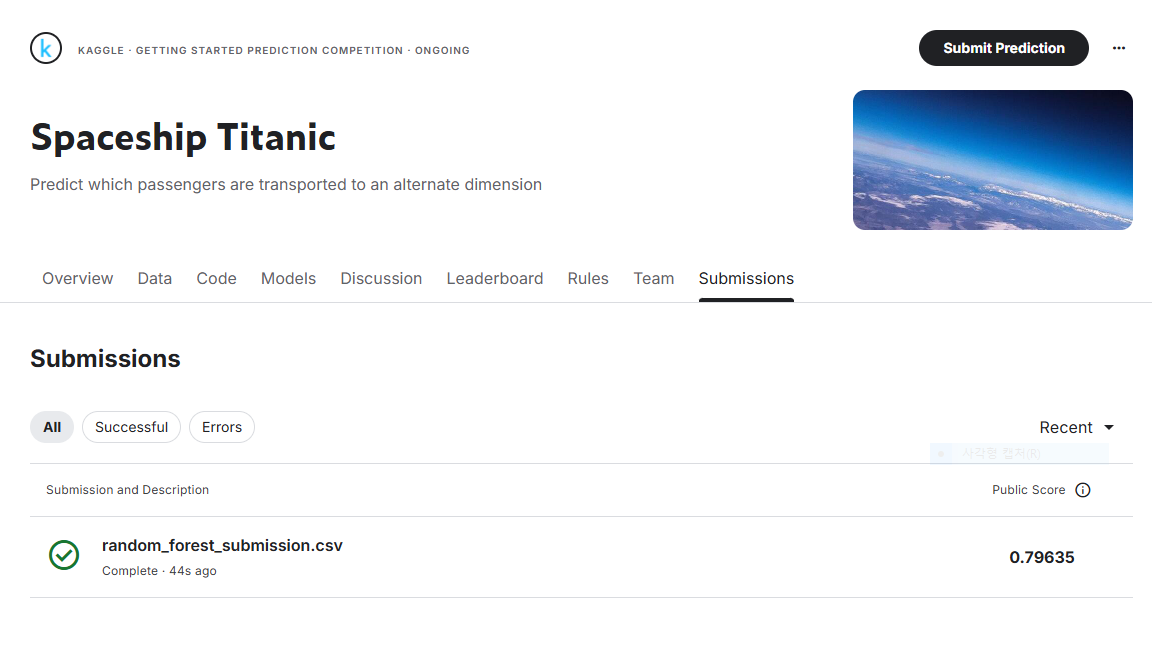

위처럼 0.79 스코어... 나오는데

이제 여기서 영향을 주는 (transported와 상관관계가 있어보이는 ) 요소들을 좀더 고민하고 더 정교하게 데이터 전처리를 해주면 개선될거 같은데....

나이를 대충 평균으로 결측치 채우지 말고 다른 방식을 쓴다거나, 지출액 등을 요리조리 계산해본다거나, 그룹을 만든다거나...

지금 토요일 18:23분이라 더 만지기 어려워 보여서... 죄송합니다 ㅠㅠ

다음 과제는 더 제대로 해보겠습니다.

